In [ ]:
#Importing the libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import PIL
import pathlib
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings("ignore")





In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train_data = pathlib.Path("/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
test_data = pathlib.Path('/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')
print(train_data)
print(test_data)

/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train
/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test


# Read the data


In [ ]:
image_count_train = len(list(train_data.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(test_data.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [ ]:
# required parameters to be defined as mentioned in problem statement
batch_size = 32
img_height = 180
img_width = 180

 80% of the images for training and rest of the 20% for validation are considered.

#  Creating the training and validation and test Data set



In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_data,
                                                               seed=200,
                                                               validation_split=0.2,
                                                               image_size=(img_height,img_width),
                                                               batch_size=batch_size,
                                                               color_mode='rgb',
                                                               subset='training')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(train_data,
                                                             seed=200,
                                                             validation_split=0.2,
                                                             image_size=(img_height,img_width),
                                                             batch_size=batch_size,
                                                             color_mode='rgb',
                                                             subset='validation')

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(test_data,
                                                             seed=200,
                                                             image_size=(img_height,img_width),
                                                             batch_size=batch_size,
                                                             color_mode='rgb')

Found 118 files belonging to 9 classes.


In [ ]:
# The classes of skin cancer are populated in a list
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# Dataset Visualisation



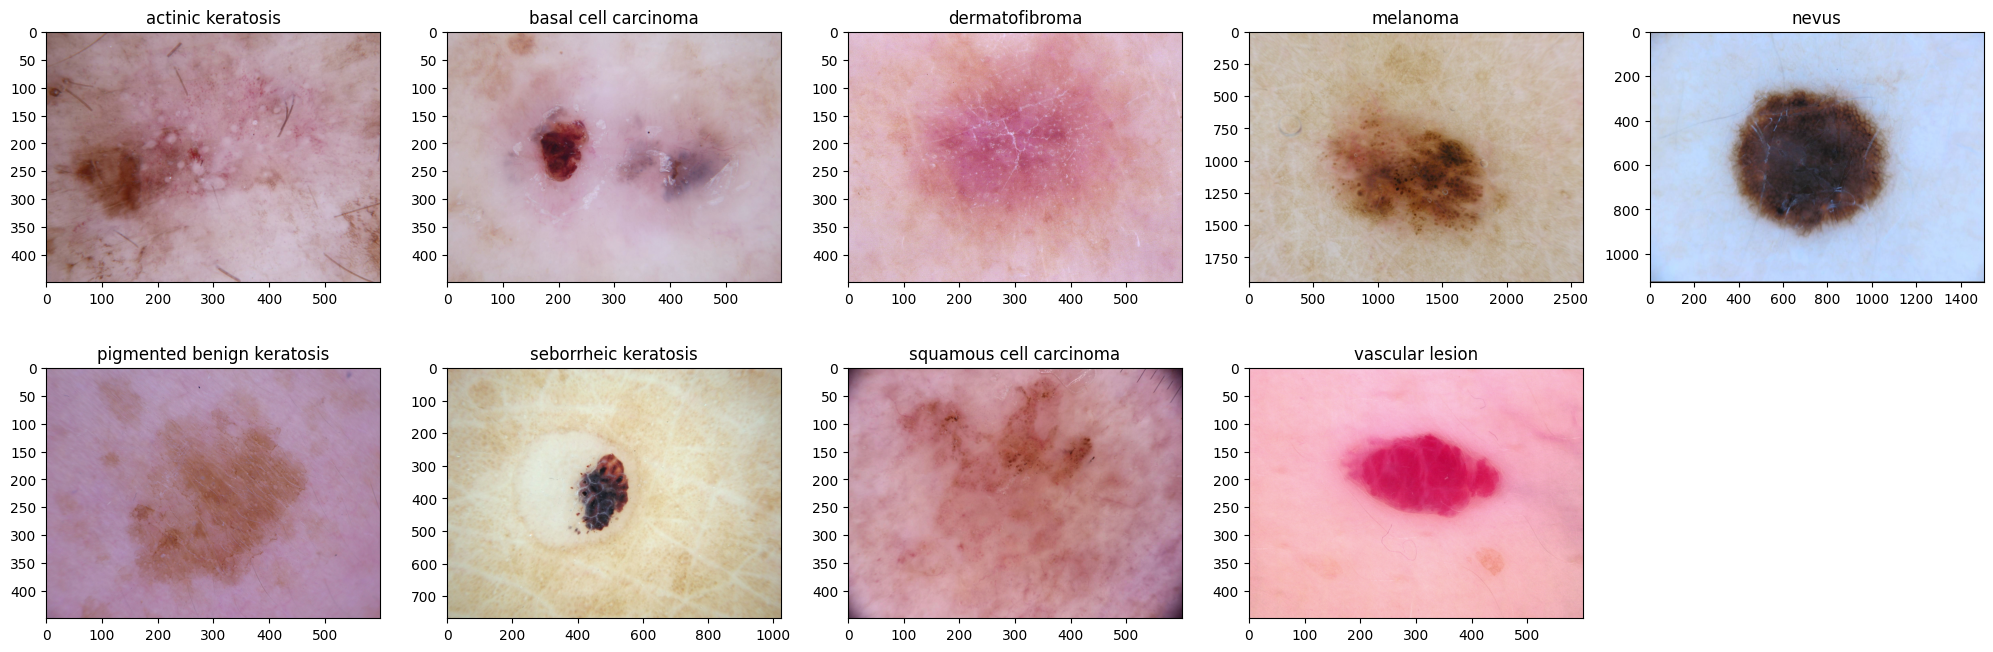

In [ ]:
# code to capture the 9 different classes
import matplotlib.pyplot as plt

plt.figure(figsize=(25,8))
for i in range(len(class_names)):
  plt.subplot(2,5,i+1)
  image= plt.imread(str(list(train_data.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [ ]:
# Fine tuning the parameters

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
# plotting of the loss and accuracy for training and validation sets:
def plot_cnn_metrics(history,epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

# Model Building & Training :



In [ ]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [ ]:
# Compiling
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 128)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 259200)            0

In [ ]:
# Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 797s 8s/step - loss: 3.6062 - accuracy: 0.1931 - val_loss: 1.9757 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 318s 6s/step - loss: 1.9190 - accuracy: 0.2740 - val_loss: 1.7572 - val_accuracy: 0.3266
Epoch 3/20
56/56 [==============================] - 301s 5s/step - loss: 1.6931 - accuracy: 0.3890 - val_loss: 1.6396 - val_accuracy: 0.4139
Epoch 4/20
56/56 [==============================] - 313s 6s/step - loss: 1.6130 - accuracy: 0.4146 - val_loss: 1.6675 - val_accuracy: 0.3893
Epoch 5/20
56/56 [==============================] - 300s 5s/step - loss: 1.4763 - accuracy: 0.4788 - val_loss: 1.4588 - val_accuracy: 0.4676
Epoch 6/20
56/56 [==============================] - 304s 5s/step - loss: 1.3184 - accuracy: 0.5363 - val_loss: 1.3433 - val_accuracy: 0.5414
Epoch 7/20
56/56 [==============================] - 297s 5s/step - loss: 1.2162 - accuracy: 0.5603 - val_loss: 1.4339 - val_accuracy: 0.4720
Epoch 8/20
56

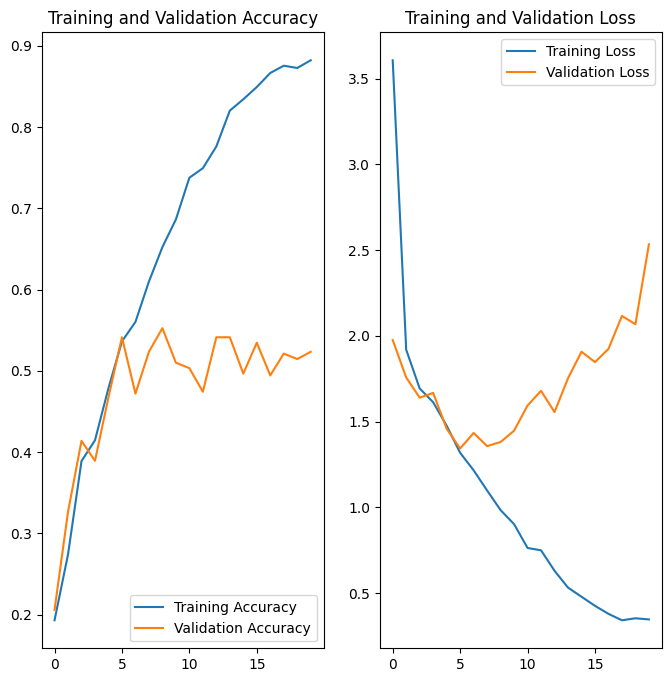

In [ ]:
#  training results
plot_cnn_metrics(history,epochs)

1.The training accuracy exhibits a linear increase over time, while the validation accuracy maintains around 50% during the training process.

2.Simultaneously, as the training loss decreases with each epoch, the validation loss increases.

3.The graph shows substantial disparities between training accuracy and validation accuracy, with the model attaining approximately 50% accuracy on the validation set.

4.The noticeable difference in accuracy between the training and validation sets signals a potential occurrence of overfitting.

# Data augmentation strategy is used to resolve underfitting/overfitting



In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

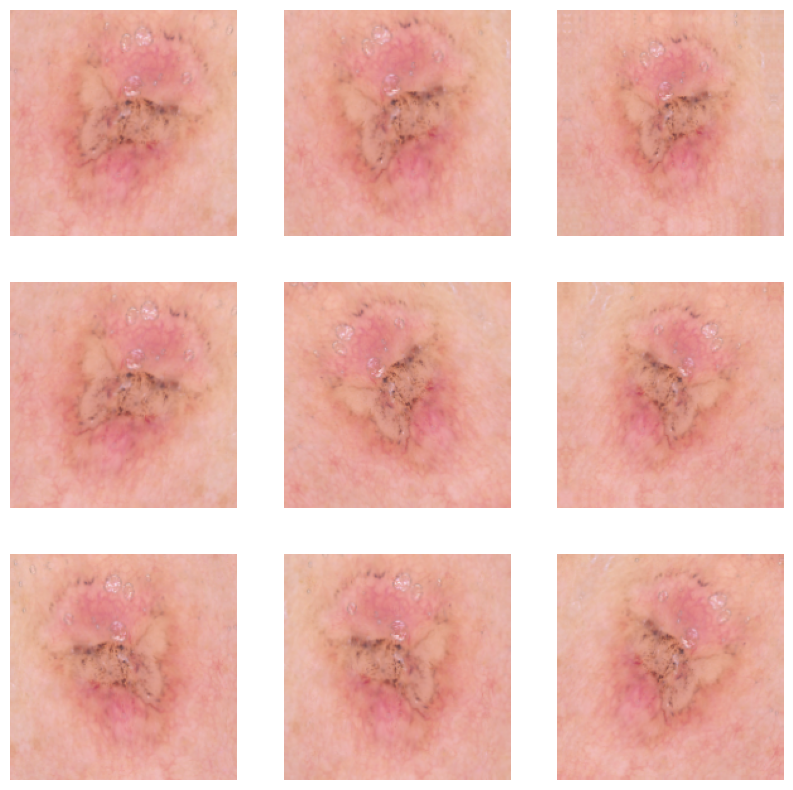

In [ ]:
# visualizing the augmentation strategy for 1 instance
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# Model Building & training on the augmented data :


In [ ]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))

# adding the augmentation layer
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [ ]:
# Compiling
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 90, 90, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 45, 45, 128)       0         
 g2D)                                                 

In [ ]:
# Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 309s 5s/step - loss: 3.6633 - accuracy: 0.2031 - val_loss: 1.9128 - val_accuracy: 0.2975
Epoch 2/20
56/56 [==============================] - 305s 5s/step - loss: 1.8703 - accuracy: 0.3181 - val_loss: 1.7304 - val_accuracy: 0.3244
Epoch 3/20
56/56 [==============================] - 301s 5s/step - loss: 1.5910 - accuracy: 0.4515 - val_loss: 1.8408 - val_accuracy: 0.3221
Epoch 4/20
56/56 [==============================] - 305s 5s/step - loss: 1.5630 - accuracy: 0.4381 - val_loss: 1.5332 - val_accuracy: 0.4228
Epoch 5/20
56/56 [==============================] - 306s 5s/step - loss: 1.4572 - accuracy: 0.4844 - val_loss: 1.3609 - val_accuracy: 0.5101
Epoch 6/20
56/56 [==============================] - 304s 5s/step - loss: 1.4283 - accuracy: 0.5095 - val_loss: 1.3853 - val_accuracy: 0.5034
Epoch 7/20
56/56 [==============================] - 303s 5s/step - loss: 1.3858 - accuracy: 0.5140 - val_loss: 1.3737 - val_accuracy: 0.5011
Epoch 8/20
56

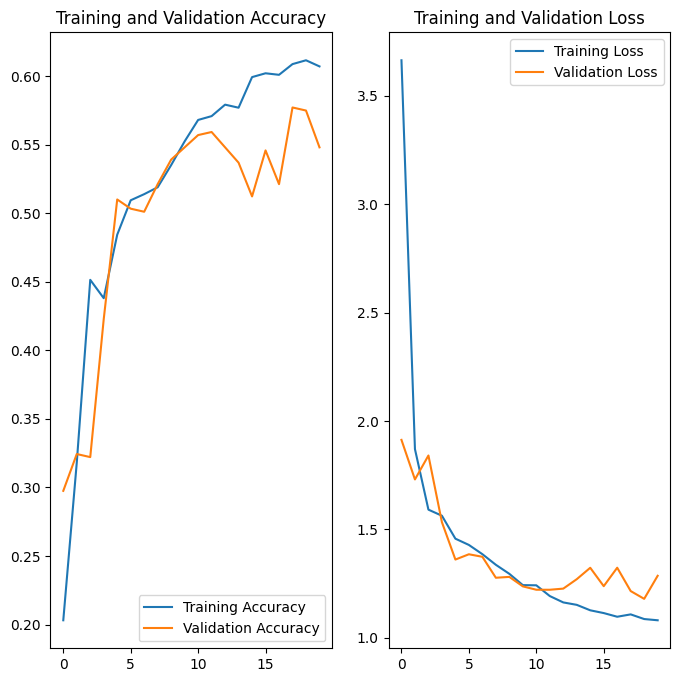

In [ ]:
# training results
plot_cnn_metrics(history,epochs)


1. While the training accuracy exhibits a linear increase over time, the validation accuracy rises but stalls at 50-55% during the training process.
2. With each epoch, the training loss steadily decreases, and a similar pattern is observed in the validation loss, which also decreases and then levels off.
3. The graphical representations illustrate a reduction in the gap between training accuracy and validation accuracy compared to the previous model, reaching an approximate accuracy of 55% on the validation set.
4.There is still a slight discernible difference in accuracy between training and validation sets, indicating a potential presence of overfitting.

# Model Building & training on the augmented data with dropout :



In [ ]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())
#adding a 20% dropout after the convolution layers
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [ ]:
# Compiling
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 90, 90, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 45, 45, 128)       0         
 g2D)                                                 

In [ ]:
# Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 341s 6s/step - loss: 3.0550 - accuracy: 0.2472 - val_loss: 1.7706 - val_accuracy: 0.3870
Epoch 2/20
56/56 [==============================] - 317s 6s/step - loss: 1.6842 - accuracy: 0.3923 - val_loss: 1.6661 - val_accuracy: 0.3758
Epoch 3/20
56/56 [==============================] - 316s 6s/step - loss: 1.5788 - accuracy: 0.4314 - val_loss: 1.4356 - val_accuracy: 0.4832
Epoch 4/20
56/56 [==============================] - 314s 6s/step - loss: 1.4291 - accuracy: 0.5011 - val_loss: 1.3541 - val_accuracy: 0.5056
Epoch 5/20
56/56 [==============================] - 323s 6s/step - loss: 1.4195 - accuracy: 0.4900 - val_loss: 1.4851 - val_accuracy: 0.4765
Epoch 6/20
56/56 [==============================] - 318s 6s/step - loss: 1.3399 - accuracy: 0.5312 - val_loss: 1.2948 - val_accuracy: 0.5347
Epoch 7/20
56/56 [==============================] - 316s 6s/step - loss: 1.2998 - accuracy: 0.5413 - val_loss: 1.3144 - val_accuracy: 0.5280
Epoch 8/20
56

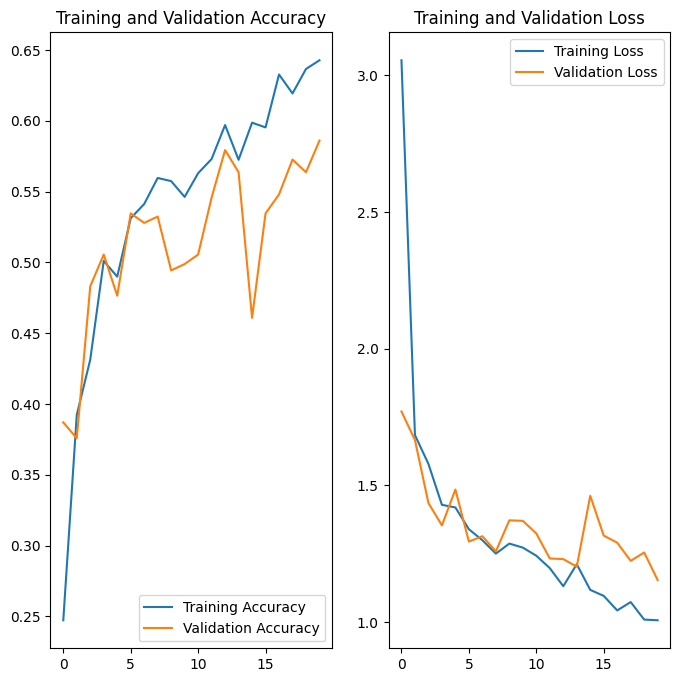

In [ ]:
# training results
plot_cnn_metrics(history,epochs)


1. While the training accuracy steadily rises over time, the validation accuracy exhibits growth but stalls at 58% during the training process. Simultaneously, the training loss diminishes with each epoch, and a corresponding reduction is observed in the validation loss.
3.Graphical representations highlight a diminished gap between training and validation accuracy compared to the previous model, reaching an approximate 58% accuracy on the validation set.
4.Notably, the disparity in accuracy between the training and validation sets is minimal.

### **It can be observed that the overfitting of the model has reduced  when compared the earlier models**



#verifying the current class distribution in the training dataset



In [ ]:
for i in range(len(class_names)):
  print(class_names[i],' - ',len(list(train_data.glob(class_names[i]+'/*.jpg'))))

actinic keratosis  -  114
basal cell carcinoma  -  376
dermatofibroma  -  95
melanoma  -  438
nevus  -  357
pigmented benign keratosis  -  462
seborrheic keratosis  -  77
squamous cell carcinoma  -  181
vascular lesion  -  139


<div class="alert alert-block alert-danger">
    <span style='font-family:Georgia'>
        <b>Questions asked in the problem statement : </b>
        <ol>
            <li>Which class has the least number of samples?<br>
            <b>seborrheic keratosis with 77 samples</b></li>
            <li>Which classes dominate the data in terms proportionate number of samples?<br>
            <b>pigmented benign keratosis with 462 samples</b></li>
        </ol>
    </span>    
</div>

# Handling class imbalances:



In [ ]:
!pip install Augmentor

In [ ]:
import pathlib
import Augmentor

path_to_training_dataset = pathlib.Path("/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

for i in class_names:
    output_directory = "/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/OutputDirectory/" + i + "/"
    p = Augmentor.Pipeline(str(path_to_training_dataset / i), output_directory=output_directory)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(400)

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/OutputDirectory/actinic keratosis/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B792C425930>: 100%|██████████| 400/400 [00:20<00:00, 19.18 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/OutputDirectory/basal cell carcinoma/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B792C003C70>: 100%|██████████| 400/400 [00:19<00:00, 20.93 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/OutputDirectory/dermatofibroma/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B792C425930>: 100%|██████████| 400/400 [00:20<00:00, 19.37 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/OutputDirectory/melanoma/.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7B793C4456C0>: 100%|██████████| 400/400 [01:21<00:00,  4.91 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/OutputDirectory/nevus/.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7B792C067B20>: 100%|██████████| 400/400 [01:12<00:00,  5.51 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/OutputDirectory/pigmented benign keratosis/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B792C1F09A0>: 100%|██████████| 400/400 [00:21<00:00, 18.72 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/OutputDirectory/seborrheic keratosis/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7B792BD263B0>: 100%|██████████| 400/400 [00:39<00:00, 10.07 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/OutputDirectory/squamous cell carcinoma/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7B792C189C60>: 100%|██████████| 400/400 [00:20<00:00, 19.72 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/OutputDirectory/vascular lesion/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B793C55CE20>: 100%|██████████| 400/400 [00:19<00:00, 20.77 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.

In [ ]:
train_data = pathlib.Path("/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/OutputDirectory/")
image_count_train = len(list(train_data.glob('*/*.jpg')))
print(image_count_train)

###  distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
import os
path_list = [x for x in glob(os.path.join(train_data, '*', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(train_data, '*', '*.jpg'))]

In [ ]:
dict_new = dict(zip(path_list, lesion_list_new))
df = pd.DataFrame(list(dict_new.items()),columns = ['Path','Label'])

In [ ]:
df['Label'].value_counts()

Added 400 images to all the classes to maintain  class balance.

In [ ]:
# initializing the parameter to load the images
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data,
  seed=200,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3600 files belonging to 9 classes.
Using 2880 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data,
  seed=200,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3600 files belonging to 9 classes.
Using 720 files for validation.


# Model Building & training on the rectified class imbalance data :

* Creating a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescaling images to normalize pixel values between (0,1).
* Choosing an appropriate optimiser and loss function for model training
* Training the model for ~30 epochs
* Plotting Graph for findings after the model fit to check if there is any evidence of model overfit or underfit.

In [ ]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())
# 20% dropout after the convolution layers
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [ ]:
# Model compiling
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 128)       0         
 g2D)                                                 

In [ ]:
# Training the model
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
90/90 [==============================] - 547s 6s/step - loss: 2.8314 - accuracy: 0.2396 - val_loss: 1.6839 - val_accuracy: 0.3458
Epoch 2/30
90/90 [==============================] - 523s 6s/step - loss: 1.6321 - accuracy: 0.3712 - val_loss: 1.4780 - val_accuracy: 0.4111
Epoch 3/30
90/90 [==============================] - 538s 6s/step - loss: 1.4876 - accuracy: 0.4278 - val_loss: 1.4273 - val_accuracy: 0.4458
Epoch 4/30
90/90 [==============================] - 519s 6s/step - loss: 1.4127 - accuracy: 0.4545 - val_loss: 1.3819 - val_accuracy: 0.4486
Epoch 5/30
90/90 [==============================] - 530s 6s/step - loss: 1.3522 - accuracy: 0.4760 - val_loss: 1.3446 - val_accuracy: 0.4847
Epoch 6/30
90/90 [==============================] - 531s 6s/step - loss: 1.3184 - accuracy: 0.4830 - val_loss: 1.3731 - val_accuracy: 0.4431
Epoch 7/30
90/90 [==============================] - 526s 6s/step - loss: 1.2286 - accuracy: 0.5229 - val_loss: 1.2325 - val_accuracy: 0.5222
Epoch 8/30
90

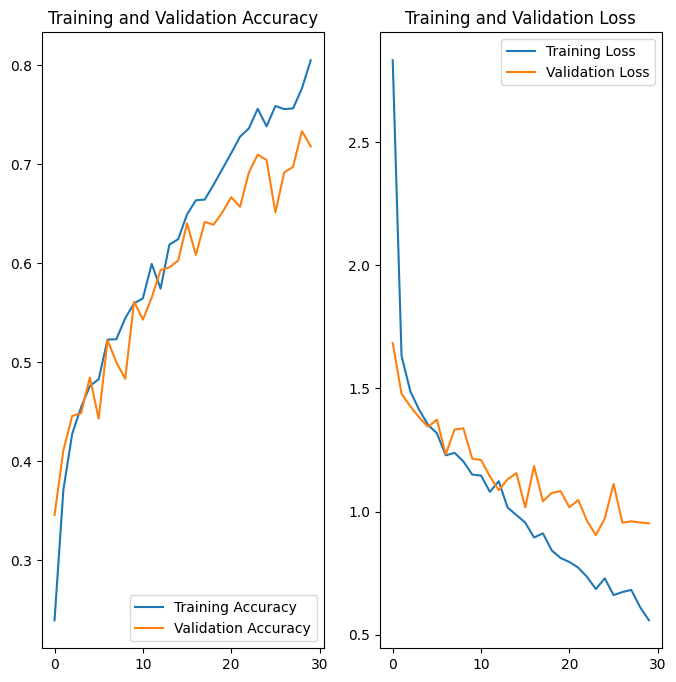

In [ ]:
# Visualizing the final model results
plot_cnn_metrics(history,epochs)

1.The training accuracy demonstrates a linear increase over time, while the validation accuracy experiences growth during the training process.

2.Simultaneously, the training loss decreases with each epoch, and a corresponding reduction is observed in the validation loss.

3.Graphs indicate a substantial decrease in the gap between training and validation accuracy compared to the previous model, achieving approximately 75% accuracy on the validation set.

4.Notably, there is minimal disparity in accuracy between the training and validation sets.

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <p>Class rebalancing reduced the overfittig overfitting and also improved the accuracy from 58% to 75%.</p>  
    </span>    
</div>